<div style="padding: 30px 25px; border: 2px #6495ed solid">
    
<b>Привет, Владислав!</b>

Меня зовут Алексей, и я буду проверять твой проект.
    
Предлагаю общаться на «<b>ты</b>», но если это неудобно — обязательно сообщи об этом.
    
Ниже ты увидишь мои комментарии, выделенные разным цветом:
    
<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Отлично!</b> ✔️: все ок, продолжай в том же духе :)

</div>
<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
<b>Есть совет</b> ⚠️: так выделены некритичные замечания или советы, которые смогут улучшить твой проект.

</div>
<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

<b>Нужно доработать</b> ❌: так выделены важные замечания — без их исправления проект не может быть принят.
    
</div>

Будет здорово, если ты будешь участвовать в диалоге, а свои вопросы, комментарии и изменения в проекте тоже будешь выделять, например, вот так:
    
<div class="alert alert-info">
    <b>Комментарий студента:</b> твой комментарий
</div>
    
Пожалуйста, не перемещай и не удаляй мои комментарии, это усложнит повторную проверку.
    
</div>

# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

# Содержание

* [Описание проекта](#0)

* [Описание данных](#1)

* [Шаг 1. Откройте файлы с данными](#2)

* [Шаг 2. Предобработка и исследовательский анализ данных](#3)

* [Шаг 3. Формулировка ML-задачи на основе бизнес-задачи](#4)

* [Шаг 4. Разработка модели ML](#5)

* [Шаг 5. Опишите портрет «ненадёжного» клиента](#6)

* [Шаг 6. Напишите общий вывод](#7)

# Описание проекта <a id='0'></a>

Заказчик этого исследования — сеть отелей «Как в гостях». 

Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.

Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

**Бизнес-метрика и другие данные**

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. 

В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 

Стоимость номеров отеля:

* категория A: за ночь — 1 000, разовое обслуживание — 400;

* категория B: за ночь — 800, разовое обслуживание — 350;

* категория C: за ночь — 600, разовое обслуживание — 350;

* категория D: за ночь — 550, разовое обслуживание — 150;

* категория E: за ночь — 500, разовое обслуживание — 150;

* категория F: за ночь — 450, разовое обслуживание — 150;

* категория G: за ночь — 350, разовое обслуживание — 150.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.

Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.

На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

# Описание данных <a id='1'></a>

В таблицах `hotel_train` и `hotel_test` содержатся одинаковые столбцы:

* `id` — номер записи;

* `adults` — количество взрослых постояльцев;

* `arrival_date_year` — год заезда;

* `arrival_date_month` — месяц заезда;

* `arrival_date_week_number` — неделя заезда;

* `arrival_date_day_of_month` — день заезда;

* `babies` — количество младенцев;

* `booking_changes` — количество изменений параметров заказа;

* `children` — количество детей от 3 до 14 лет;

* `country` — гражданство постояльца;

* `customer_type` — тип заказчика:

  * `Contract` — договор с юридическим лицом;

  * `Group` — групповой заезд;

  * `Transient` — не связано с договором или групповым заездом;

  * `Transient-party` — не связано с договором или групповым заездом, но связано с бронированием типа Transient.

* `days_in_waiting_list` — сколько дней заказ ожидал подтверждения;

* `distribution_channel` — канал дистрибуции заказа;

* `is_canceled` — отмена заказа;

* `is_repeated_guest` — признак того, что гость бронирует номер второй раз;

* `lead_time` — количество дней между датой бронирования и датой прибытия;

* `meal` — опции заказа:

  * `SC` — нет дополнительных опций;

  * `BB` — включён завтрак;

  * `HB` — включён завтрак и обед;

  * `FB` — включён завтрак, обед и ужин.

* `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;

* `previous_cancellations` — количество отменённых заказов у клиента;

* `required_car_parking_spaces` — необходимость места для автомобиля;

* `reserved_room_type` — тип забронированной комнаты;

* `stays_in_weekend_nights` — количество ночей в выходные дни;

* `stays_in_week_nights` — количество ночей в будние дни;

* `total_nights` — общее количество ночей;

* `total_of_special_requests` — количество специальных отметок.

# Шаг 1. Откройте файлы с данными <a id='2'></a>

**Пути к файлам:** 

`/datasets/hotel_train.csv` **— данные для обучения модели.** 

[Скачать датасет](https://code.s3.yandex.net/datasets/hotel_train.csv)

`/datasets/hotel_test.csv` **— данные для тестирования модели.** 

[Скачать датасет](https://code.s3.yandex.net/datasets/hotel_test.csv)

In [1]:
# импорт всех нужных библиотек
import pandas as pd
import numpy as np
from sklearn.metrics import * 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.dummy import DummyClassifier
from scipy.stats import iqr
import warnings

In [2]:
warnings.filterwarnings('ignore') # отключаем предупреждения

In [3]:
pd.set_option('display.max_columns', None) # настроим в выоде показ всех колонок

In [4]:
df = pd.read_csv('/datasets/hotel_train.csv')
df_test = pd.read_csv('/datasets/hotel_test.csv')

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: данные на месте!</div>

In [5]:
#Функция для проверки датасетов
def information(data):
    display(data.head())
    print(data.info())
    print('Количество дубликатов:', data['id'].duplicated().sum())
    print(f'''Пропусков:
{data.isna().sum()}''')
    display(data.describe())
    print(data.shape)

In [6]:
information(df)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000,65229.000000
mean,43544.069172,0.368609,96.337917,2015.719021,31.339772,15.847813,0.825185,2.224793,1.836576,0.074890,0.007236,0.027151,0.128915,0.107713,0.194269,3.334422,0.056647,0.512763,3.049978
std,25614.858971,0.482431,96.127545,0.449481,13.464024,8.748182,0.853477,1.354992,0.480245,0.334243,0.098790,0.162523,0.965326,1.326638,0.593838,18.239606,0.232094,0.752590,1.738108
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19108.000000,0.000000,17.000000,2015.000000,21.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,40554.000000,0.000000,64.000000,2016.000000,34.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,67414.000000,1.000000,151.000000,2016.000000,42.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,84121.000000,1.000000,374.000000,2016.000000,53.000000,31.000000,4.000000,6.000000,4.000000,3.000000,10.000000,1.000000,26.000000,58.000000,17.000000,259.000000,3.000000,5.000000,10.000000


(65229, 25)


In [7]:
information(df_test)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

,id,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,total_nights
count,32412.000000,32412.000000,32412.000000,32412.0,32412.000000,32412.000000,32412.000000,32412.00000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000,32412.000000
mean,60131.505183,0.388467,97.587869,2017.0,17.804054,15.656948,0.867888,2.34009,1.858602,0.083765,0.005523,0.031377,0.011601,0.171418,0.216741,0.262341,0.046248,0.657781,3.207979
std,29953.586177,0.487409,86.507146,0.0,9.177384,8.766429,0.853394,1.37517,0.489341,0.343470,0.075757,0.174338,0.180473,1.875170,0.640551,4.733027,0.219367,0.834341,1.738683
min,6086.000000,0.000000,0.000000,2017.0,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,45291.750000,0.000000,23.000000,2017.0,10.000000,8.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,53394.500000,0.000000,76.000000,2017.0,18.000000,15.500000,1.000000,2.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,89800.250000,1.000000,155.000000,2017.0,25.000000,23.000000,2.000000,3.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000
max,97903.000000,1.000000,373.000000,2017.0,35.000000,31.000000,4.000000,6.00000,4.000000,3.000000,2.000000,1.000000,6.000000,72.000000,18.000000,223.000000,8.000000,5.000000,10.000000


(32412, 25)


In [8]:
df.dtypes == df_test.dtypes #Смотрим, одинаковы ли типы данных в датасетах

id                                True
is_canceled                       True
lead_time                         True
arrival_date_year                 True
arrival_date_month                True
arrival_date_week_number          True
arrival_date_day_of_month         True
stays_in_weekend_nights           True
stays_in_week_nights              True
adults                            True
children                          True
babies                            True
meal                              True
country                           True
distribution_channel              True
is_repeated_guest                 True
previous_cancellations            True
previous_bookings_not_canceled    True
reserved_room_type                True
booking_changes                   True
days_in_waiting_list              True
customer_type                     True
required_car_parking_spaces       True
total_of_special_requests         True
total_nights                      True
dtype: bool

In [9]:
df.isnull()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65225,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65226,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
65227,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df_test.isnull()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Гистограммы распределения признаов в тренировочном датасете

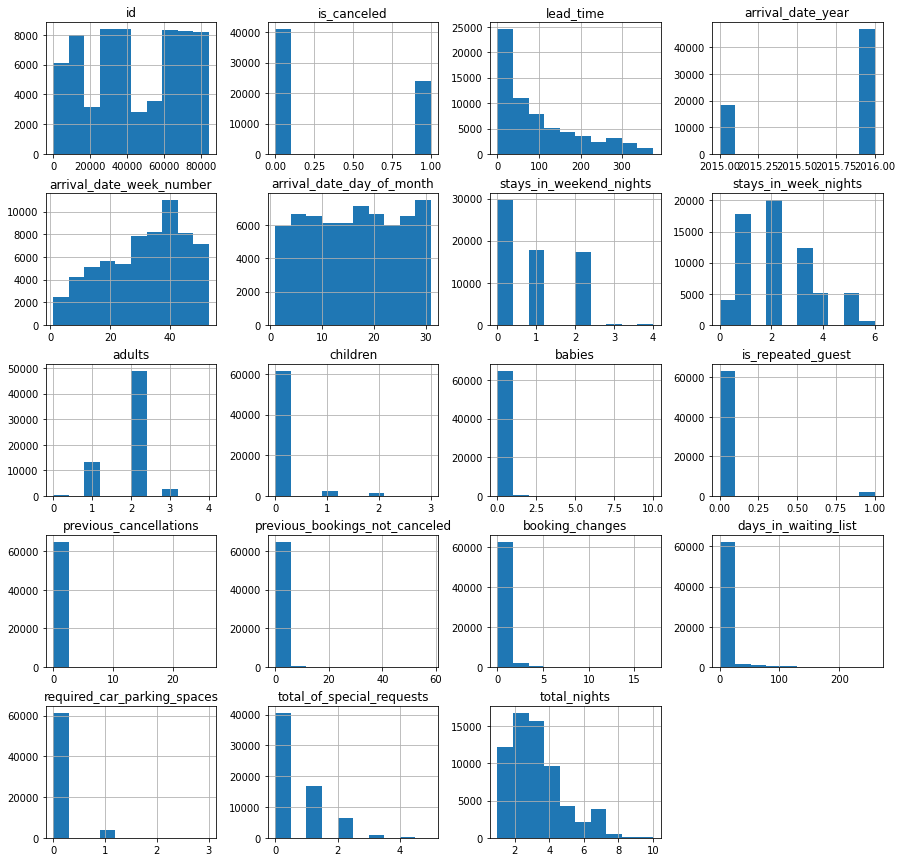

In [11]:
df.hist(figsize = (15, 15));

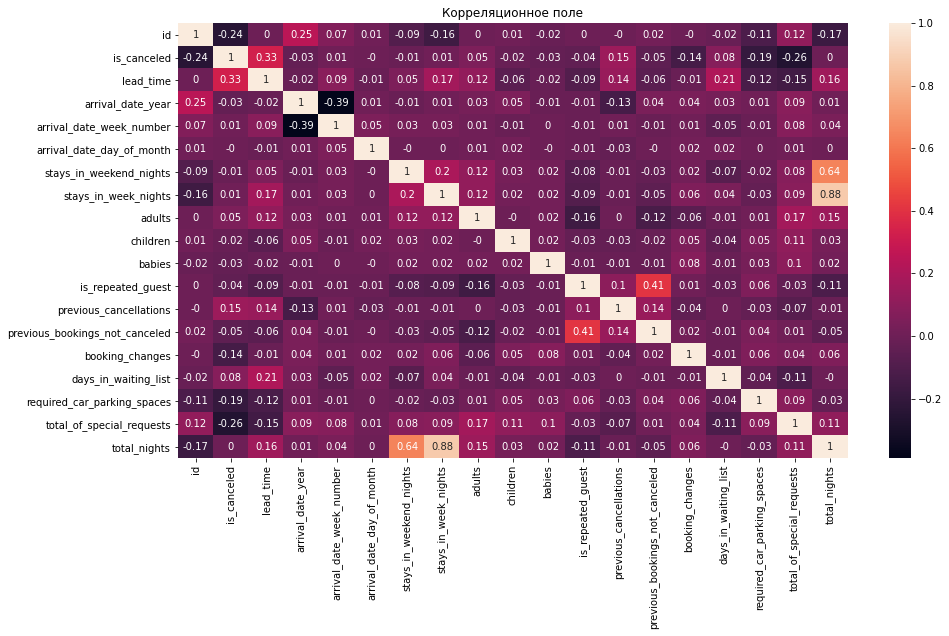

In [12]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr().round(2), annot = True)
plt.title('Корреляционное поле')
plt.show()

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: молодец, что изучаешь матрицу корреляций!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: чтобы значения на графике не накладывались друг на друга, можно их округлить, например, до 2 знаков: `df.corr().round(2)`</div>

**Вывод**

Информация о данных получена, построенные гистограммы, график парных коэффициентов корреляции и выведена основная информация о каждом признаке в датасетах. Пропусков нет, с аномальными значениями будем разбираться дальше. Есть явная взаоимосвязть между total_nights и stays_in_week_nights, stays_in_weekend_nights

# Шаг 2. Предобработка и исследовательский анализ данных <a id='3'></a>

* **Проверьте данные и откорректируйте их, если потребуется.**

* **Проведите исследовательский анализ представленных данных. Опишите найденные особенности: пропуски, выбросы.**

Что мы будем делалть?
- проверим есть ли в данных дубликаты
- удалим столбцы и строки, которые не пригодятся в дальнейшей работе
- поменяем у некоторых столбцов тип данных
- рассмотрим каждый каждый признак отдельно


Весь анализ данных будет происходить на тренирочной выборке, а далее будут приняты решения, что менять в этой тренировочной выборке.

## Дубликаты

In [13]:
if ~df.duplicated().any():
    print('Дубликатов в тренировочной выборке нет')
else:
    print('Дубликаты есть')

Дубликатов в тренировочной выборке нет


In [14]:
if ~df_test.duplicated().any():
    print('Дубликатов в тестовой выборке нет')
else:
    print('Дубликаты есть')

Дубликатов в тестовой выборке нет


<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: еще стоит проверить наличие полных дубликатов после удаления id</div>

## Ненужные столбцы и строки

In [15]:
df.shape

(65229, 25)

In [16]:
df.arrival_date_year.value_counts()

2016    46901
2015    18328
Name: arrival_date_year, dtype: int64

In [17]:
df.arrival_date_week_number.unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [18]:
df.arrival_date_day_of_month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [19]:
df.total_nights.value_counts(normalize = True)

2     0.257478
3     0.239955
1     0.185838
4     0.147618
5     0.065738
7     0.059069
6     0.031857
8     0.008309
9     0.002330
10    0.001809
Name: total_nights, dtype: float64

In [20]:
df.distribution_channel.value_counts(normalize = True)

TA/TO        0.834813
Direct       0.105061
Corporate    0.058609
GDS          0.001518
Name: distribution_channel, dtype: float64

* id - для всех разный, не поможет в обучении модели


* arrival_date_year - всего два года, для следующих лет эта информация бесполезна


* arrival_date_week_number - большая вариация выбора, далее создам просто колонку с сезоном года


* arrival_date_day_of_month - день месяца будет бесполезен в обучении модели, так как информация изменяется в днях не из-за самих дней, а из-за сезоона


* total_nights - не нужен, так как есть кол-во ночей в рабочие и выходные дни


* distribution_channel - то, откуда перешел покупатель или где конкретно купил билеты, не влияет на его отмену броирования

In [21]:
df['stays_in_week_nights'] + df['stays_in_weekend_nights'] == df['total_nights']

0        True
1        True
2        True
3        True
4        True
         ... 
65224    True
65225    True
65226    True
65227    True
65228    True
Length: 65229, dtype: bool

In [22]:
df = df.drop(['id','arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
             'total_nights', 'distribution_channel', 'is_repeated_guest'], axis = 1)

df_test = df_test.drop(['id','arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
             'total_nights', 'distribution_channel', 'is_repeated_guest'], axis = 1)

Проверим на дубликаты без столбца id

In [23]:
print(f'Дубликатов в hotel_train: {round(df.duplicated().mean() * 100, 2)}%')
print(f'Дубликатов в hotel_test: {round(df_test.duplicated().mean() * 100, 2)}%')

Дубликатов в hotel_train: 34.59%
Дубликатов в hotel_test: 24.79%


Ошеломляющий результат, причем, судя по признакам, это не может быть просто совпадением. Но это вполне могли быть несколько бронирований, сделанных одним клиентом в один день по ошибке. Проверить наверняка мы это не можем. Поэтому удалять не будем.

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: согласен, эти признаки будут неинформативны</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: судя по описанию, `total_nights` — это действительно сумма `stays_in_week_nights` и `stays_in_weekend_nights`, но тогда перед удалением лучше убедиться, что это условие выполняенется для всех бронирований</div>

## Тип данных

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     65229 non-null  int64  
 1   lead_time                       65229 non-null  float64
 2   arrival_date_month              65229 non-null  object 
 3   stays_in_weekend_nights         65229 non-null  int64  
 4   stays_in_week_nights            65229 non-null  int64  
 5   adults                          65229 non-null  float64
 6   children                        65229 non-null  float64
 7   babies                          65229 non-null  float64
 8   meal                            65229 non-null  object 
 9   country                         65229 non-null  object 
 10  previous_cancellations          65229 non-null  int64  
 11  previous_bookings_not_canceled  65229 non-null  int64  
 12  reserved_room_type              

In [25]:
# переведем из вещественного типа в целочисленный
df[['lead_time','adults', 'children','babies']] = df[['lead_time','adults', 'children', 'babies']].astype(int)
df_test[['lead_time','adults', 'children','babies']] = df_test[['lead_time','adults', 'children', 'babies']].astype(int)

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

## Информация о признаках

### отменен ли заказ

In [26]:
df.is_canceled.value_counts()

0    41185
1    24044
Name: is_canceled, dtype: int64

### количество дней между бронированием и прибытием

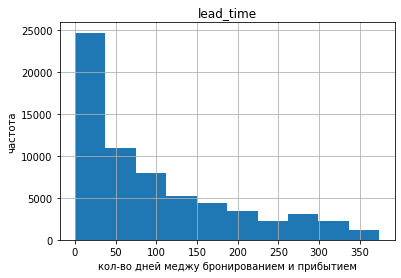

In [27]:
df.hist('lead_time');
plt.xlabel('кол-во дней меджу бронированием и прибытием')
plt.ylabel('частота')
plt.show()

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: не совсем понятно, что ты узнал благодаря выводу этого графика, убедись, что есть промежуточные выводы к анализу каждого признака</div>

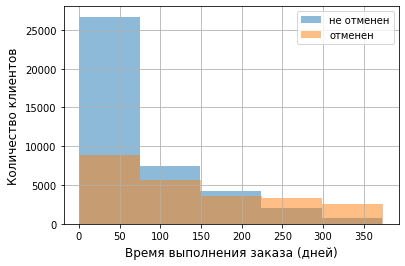

In [28]:
df.groupby('is_canceled')['lead_time'].hist( bins=5, alpha=0.5, label='Время выполнения заказов')
plt.xlabel('Время выполнения заказа (дней)',fontsize = 12, labelpad = 5)
plt.ylabel('Количество клиентов',fontsize = 12, labelpad = 5)
plt.legend((['не отменен', 'отменен']))
plt.show()

Отмененные заказы в среднем имеют более длительное время выполнения. 

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Смею предположить, что сеть отелей «Как в гостях» имеет несколько отелей курортного типа т.к. имеет место раннее бронирование.
</div>

### месяц прибытия

In [29]:
df.arrival_date_month.unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [30]:
print(df.arrival_date_month.value_counts())

October      9255
September    8782
August       6678
November     5761
July         5718
December     5497
April        4804
May          4677
June         4659
March        4148
February     3358
January      1892
Name: arrival_date_month, dtype: int64


Для дальнейших расчетов с использованием сезонных коэффициентов:

In [31]:
# функция для опредлеения времени года
def season(month):
    if month == 'October' or month == 'September' or month == 'November':
        return 'autumn'
    if month == 'August' or month == 'July' or month == 'June':
            return 'summer'
    if month == 'April' or month == 'May' or month == 'March':
        return 'spring'
    if month == 'January' or month == 'February' or month == 'December':
        return 'winter'
df['season'] = df['arrival_date_month'].apply(season)
df_test['season'] = df_test['arrival_date_month'].apply(season)

In [32]:
df.head()

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,season
0,0,7,July,0,1,1,0,0,BB,GBR,0,0,A,0,0,Transient,0,0,summer
1,0,14,July,0,2,2,0,0,BB,GBR,0,0,A,0,0,Transient,0,1,summer
2,0,0,July,0,2,2,0,0,BB,PRT,0,0,C,0,0,Transient,0,0,summer
3,0,9,July,0,2,2,0,0,FB,PRT,0,0,C,0,0,Transient,0,1,summer
4,1,85,July,0,3,2,0,0,BB,PRT,0,0,A,0,0,Transient,0,1,summer


In [33]:
df.season.value_counts()

autumn    23798
summer    17055
spring    13629
winter    10747
Name: season, dtype: int64

### количество ночей в выходные в отеле

In [34]:
print(df.stays_in_weekend_nights.value_counts())

0    29738
1    17721
2    17357
3      261
4      152
Name: stays_in_weekend_nights, dtype: int64


4 ночей возможно при заселении в пт.-вс.: 9 дней (мах 10).

### количество ночей в будние дни

In [35]:
print(df.stays_in_week_nights.value_counts())

2    20137
1    17850
3    12341
4     5131
5     5128
0     4007
6      635
Name: stays_in_week_nights, dtype: int64


6 ночей возможно призаселении в пт.- сб.: 8 дней (мах 10).

### количество взрослых

In [36]:
df.adults.value_counts()

2    48980
1    13212
3     2858
0      166
4       13
Name: adults, dtype: int64

In [37]:
df[(df['adults'] == 0)] 

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,season
17540,0,1,August,1,1,0,3,0,BB,PRT,0,0,B,1,0,Transient-Party,0,0,summer
17598,0,104,August,0,3,0,2,0,BB,FRA,0,0,B,1,0,Transient-Party,0,2,summer
17982,0,3,August,2,0,0,2,0,BB,PRT,0,0,B,1,0,Transient-Party,0,1,summer
21556,1,48,October,1,3,0,2,0,BB,PRT,0,0,B,0,0,Transient-Party,0,1,autumn
22516,1,6,December,1,0,0,3,0,BB,PRT,0,0,B,0,0,Transient-Party,0,1,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64751,0,197,December,1,4,0,3,0,HB,FRA,0,0,A,7,0,Transient-Party,0,0,winter
64882,0,104,December,2,1,0,2,0,BB,PRT,0,0,B,1,0,Transient,0,2,winter
64892,0,104,December,2,1,0,2,0,BB,FRA,0,0,B,0,0,Transient,0,2,winter
64903,0,247,December,2,3,0,2,0,BB,PRT,0,0,B,0,0,Transient,0,1,winter


Такие объекты невозможны, возможно была ошибка в заполнении анкеты. Забронировать комнату не взрослый не мог.

In [38]:
df = df.query('adults != 0') # удалим такие объекты
df_test = df_test.query('adults != 0')

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, детям до 14 лет без взрослых сдать номер не могут</div>

### количество детей

In [39]:
df.children.value_counts()

0    61697
1     2163
2     1195
3        8
Name: children, dtype: int64

### количество младенцев

In [40]:
df.babies.value_counts()

0     64614
1       444
2         3
9         1
10        1
Name: babies, dtype: int64

In [41]:
df = df.query('babies < 9')# скорее всего значения в 9 и 10 были выставлены по ошибке
df_test = df_test.query('babies < 9')

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: все так, но бронирований с 2 младенцами тоже слишком мало, чтобы использовать их для прогноза, такие записи тоже лучше удалить или приравнять к 1. Тогда признак можно переименовать, например, в `has_babies`, чтобы обозначить его теперь уже бинарную природу</div>

In [42]:
df.drop(df[df['babies'] > 1].index, inplace=True)
df.drop(df[df['babies'] > 1].index, inplace=True)

### опции заказа

In [43]:
df.meal.value_counts()

BB           51543
HB            7287
SC            5262
SC             515
FB             451
Name: meal, dtype: int64

In [44]:
df.meal.unique() # надо избавиться от пробелов в значениях

array(['BB       ', 'FB       ', 'HB       ', 'SC       ', 'SC'],
      dtype=object)

In [45]:
df['meal'] = df['meal'].str.strip() # функция для удаления пробелов из строк
df_test['meal'] = df_test['meal'].str.strip()

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: хорошо, что заметил лишние пробелы!</div>

### страна

In [46]:
df.country.sort_values().unique()

array(['ABW', 'AGO', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'ATA', 'AUS',
       'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR',
       'BIH', 'BLR', 'BOL', 'BRA', 'BRB', 'BWA', 'CHE', 'CHL', 'CHN',
       'CIV', 'CMR', 'CN', 'COL', 'CPV', 'CRI', 'CUB', 'CYM', 'CYP',
       'CZE', 'DEU', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP',
       'EST', 'ETH', 'FIN', 'FRA', 'GAB', 'GBR', 'GEO', 'GGY', 'GIB',
       'GLP', 'GNB', 'GRC', 'GUY', 'HKG', 'HND', 'HRV', 'HUN', 'IDN',
       'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM',
       'JEY', 'JOR', 'JPN', 'KAZ', 'KEN', 'KHM', 'KNA', 'KOR', 'KWT',
       'LBN', 'LBY', 'LCA', 'LIE', 'LKA', 'LTU', 'LUX', 'LVA', 'MAC',
       'MAR', 'MCO', 'MDV', 'MEX', 'MKD', 'MLI', 'MLT', 'MMR', 'MNE',
       'MOZ', 'MUS', 'MWI', 'MYS', 'NAM', 'NGA', 'NIC', 'NLD', 'NOR',
       'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PLW', 'POL', 'PRI',
       'PRT', 'PRY', 'PYF', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SEN',
       'SGP', 'SLV', 

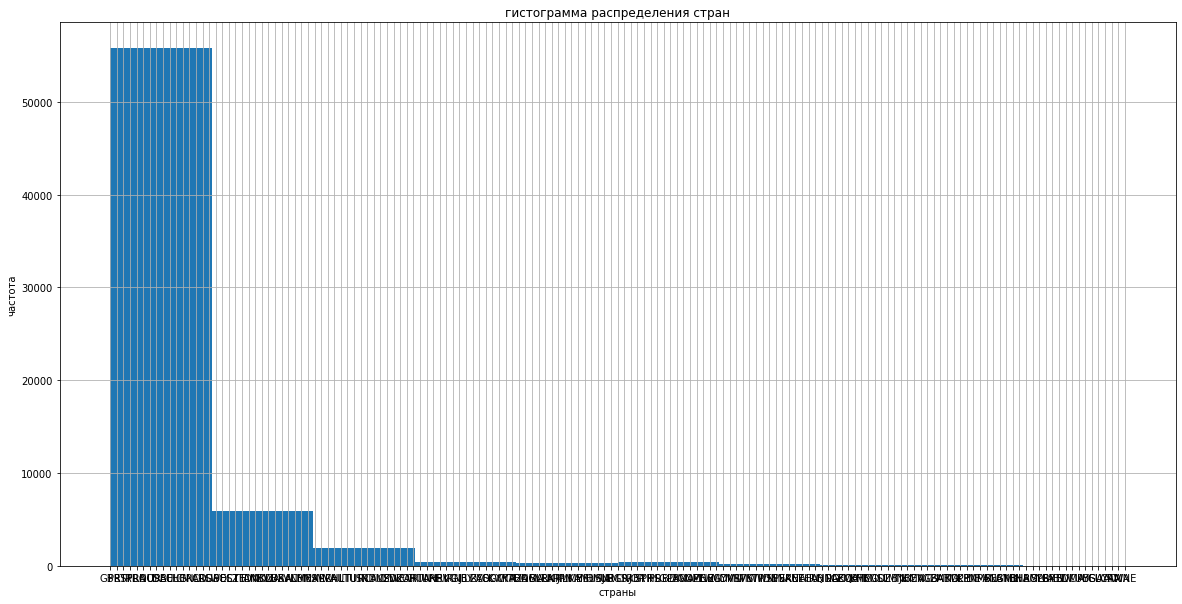

In [47]:
df['country'].hist(figsize = (20, 10))
plt.xlabel('страны')
plt.ylabel('частота')
plt.title('гистограмма распределения стран')
plt.show()

Есть редкие страны. Будет удобнее объединить эти страны в одну категорию - "other", если они встречаются реже 50 раз.

In [48]:
comb = pd.DataFrame(df.country.value_counts()).query('country <= 50').index # страны, которые встречаеются реже 50 раз

comb2 = pd.DataFrame(df_test.country.value_counts()).query('country <= 50').index

In [49]:
def coun(row): # функция для смены редкй страны на категорию 'other'
    if row in comb or row in comb2:
        return 'other'
    return row
df.country = df.country.apply(coun)
df_test.country = df_test.country.apply(coun)

In [50]:
df.country.value_counts()

PRT      28789
FRA       5958
GBR       5094
ESP       4887
DEU       3879
ITA       2319
other     1791
IRL       1442
BEL       1231
NLD       1159
BRA       1083
USA       1005
CHE        866
AUT        715
SWE        541
POL        529
CHN        525
CN         488
ISR        375
RUS        293
NOR        261
ROU        247
FIN        239
DNK        199
AUS        168
TUR        168
AGO        140
LUX        133
MAR        123
HUN        121
JPN        117
ARG        106
KOR         67
Name: country, dtype: int64

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: верно, это вполне подходящий способ оставить только репрезентативные страны в датасете</div>

### отменяли ли раньше

In [51]:
df.previous_cancellations.value_counts()

0     59421
1      5366
2        54
3        51
11       35
24       28
25       19
26       18
19       17
5        13
13       12
14       11
6         7
4         5
21        1
Name: previous_cancellations, dtype: int64

### количество неотмененных заказов

In [52]:
df.previous_bookings_not_canceled.value_counts()

0     63516
1       644
2       252
3       136
4       114
5        89
6        56
7        34
8        25
9        23
10       21
11       16
12       14
25       10
13        9
21        8
14        8
22        7
15        7
16        6
20        5
19        5
18        5
17        5
24        3
27        3
29        2
28        2
44        2
23        2
48        2
41        1
54        1
55        1
56        1
53        1
33        1
57        1
26        1
58        1
30        1
34        1
51        1
35        1
52        1
40        1
50        1
49        1
47        1
32        1
36        1
45        1
37        1
38        1
43        1
39        1
42        1
31        1
Name: previous_bookings_not_canceled, dtype: int64

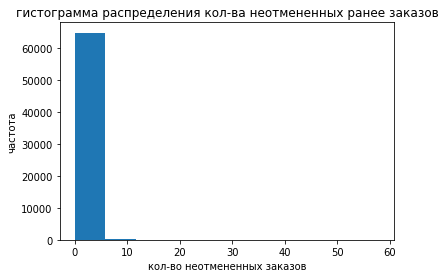

In [53]:
df['previous_bookings_not_canceled'].plot(kind = 'hist')
plt.xlabel('кол-во неотмененных заказов');
plt.ylabel('частота')
plt.title('гистограмма распределения кол-ва неотмененных ранее заказов')
plt.show();

In [54]:
df = df.query('previous_bookings_not_canceled <= 25') # считаю, что важный показатель, а число неотмененных заказов в 25
# выглядит реально
df_test = df_test.query('previous_bookings_not_canceled <= 25')

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: здесь должна быть связь между тремя признаками: `previous_cancellations`, `is_repeated_guest` и `previous_bookings_not_canceled`: если клиент бронирует номер не в первый раз, то у него должны быть либо отмененные заказы, либо подтвержденные(либо и то, и другое). Если это условие не соблюдается, то все три признака могут усложнить или запутать модель, поэтому можно их упростить: например, добавить вместо них два новых бинарных признака: `has_cancellations` и `has_successful_bookings`. Если ты считаешь, что количество успешных/отмененных бронирований также важно для моделей, то можно удалить признак `is_repeated_guest`</div>

### тип комнаты

In [55]:
df.reserved_room_type.value_counts()

A                   50451
D                    9383
E                    2442
F                    1211
B                     714
G                     592
C                     227
Name: reserved_room_type, dtype: int64

In [56]:
df.reserved_room_type.unique()

array(['A               ', 'C               ', 'D               ',
       'E               ', 'G               ', 'F               ',
       'B               '], dtype=object)

In [57]:
df['reserved_room_type'] = df['reserved_room_type'].str.strip() # удялим пробелы
df_test['reserved_room_type'] = df_test['reserved_room_type'].str.strip()

### количество изменений заказа

In [58]:
df.booking_changes.value_counts()

0     56051
1      6574
2      1742
3       403
4       149
5        41
6        19
7        17
8         7
9         5
13        4
10        2
14        2
15        2
16        1
17        1
Name: booking_changes, dtype: int64

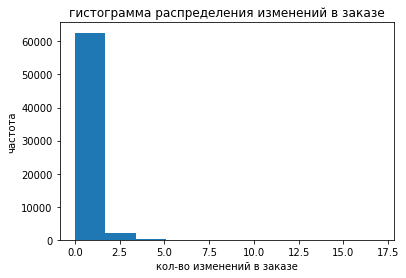

In [59]:
df['booking_changes'].plot(kind = 'hist')
plt.xlabel('кол-во изменений в заказе');
plt.ylabel('частота')
plt.title('гистограмма распределения изменений в заказе')
plt.show();

In [60]:
df = df.query('booking_changes <= 5')
df_test = df_test.query('booking_changes <= 5') 

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: 👍</div>

### количество дней ожидания подтверждения

In [61]:
df.days_in_waiting_list.sort_values().unique()

array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
        14,  15,  17,  19,  20,  21,  22,  24,  25,  27,  28,  30,  31,
        32,  33,  34,  35,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  53,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  65,  68,  69,  70,  71,  72,  74,  75,  76,  77,  79,  80,
        81,  85,  87,  89,  91,  93,  96,  98,  99, 101, 107, 108, 111,
       120, 122, 125, 142, 147, 150, 160, 162, 167, 174, 176, 178, 187,
       193, 207, 215, 224, 236, 259])

In [62]:
df = df.query('days_in_waiting_list < 25') # из опыта пользованиями сервисами, бронь подтверждается не более 5 дней 
# 
df_test = df_test.query('days_in_waiting_list < 25')

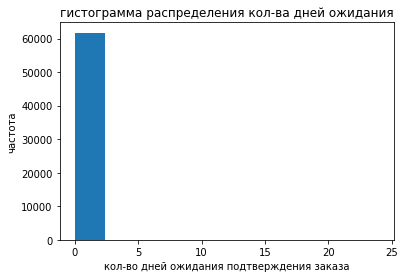

In [63]:
df['days_in_waiting_list'].plot(kind = 'hist')
plt.xlabel('кол-во дней ожидания подтверждения заказа')
plt.ylabel('частота')
plt.title('гистограмма распределения кол-ва дней ожидания')
plt.show();

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: для этого признака также стоит построить гистограмму, чтобы аргументировать свой выбор порога для отсечения: личный опыт, конечно, может быть полезен, но определить выбросы без распределения признака не получится</div>

### тип заказчика

In [64]:
df.customer_type.value_counts()

Transient          43803
Transient-Party    15313
Contract            2742
Group                284
Name: customer_type, dtype: int64

### количество мест для парковки

In [65]:
df.required_car_parking_spaces.value_counts()

0    58471
1     3659
2       11
3        1
Name: required_car_parking_spaces, dtype: int64

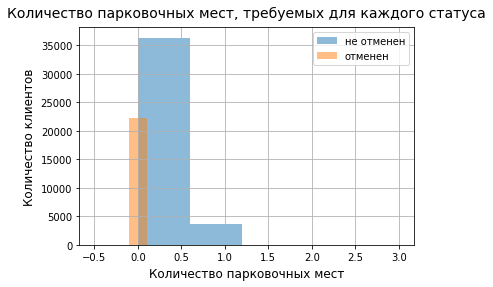

In [66]:
df.groupby('is_canceled')['required_car_parking_spaces'].hist(bins=5, alpha=0.5)
plt.title('Количество парковочных мест, требуемых для каждого статуса', fontsize = 14, pad = 10)
plt.xlabel('Количество парковочных мест', fontsize = 12, labelpad = 5)
plt.ylabel('Количество клиентов', fontsize = 12, labelpad = 5)
plt.legend((['не отменен', 'отменен']))
plt.show()

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: по аналогии с количеством младенцев, этот признак также можно сделать бинарным и переименовать, например, в `is_parking_space_required`</div>

### количество специальных отметок

In [67]:
df.total_of_special_requests.value_counts()

0    37950
1    16654
2     6395
3     1026
4      105
5       12
Name: total_of_special_requests, dtype: int64

**Вывод**

__Все признаки посмотрели, от всех аномальных значений избавились.__


* тип данных в столбцах 'lead_time','adults', 'children','babies' был изменен



* ненужные столбцы  'id','arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'total_nights', 'distribution_channel' были удалены


* данные проверены на дубликаты, дубаликатов не обнаружено


* были добавлены времена года в датасет


* строки, где кол-во взрослых было равно 0, были удалены


* были удалены количество ночей в выходные более 2 и количество ночей в будние более 5
 

* строки с кол-вом детей со значениями 9 и 10 были удалдены


* из значений опций заказов и типа комнаты были удалены лишние пробелы


* страны, встречающиеся реже 50 раз, были объеденены в одну категорию - "Другие"


* значения неотмененных заказов, превышающие 2 дня, были удалены


* были оставлены значения меньше 5 в признаке "изменения в заказе"


* значения более 2, в признаке "кол-во дней ожидание подтверждения" были удалены

<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: все так, можно переходить к расчету прибыли</div>

# Шаг 3. Формулировка ML-задачи на основе бизнес-задачи <a id='4'></a>

**Вычислите бизнес-метрику**

**Оцените прибыль отеля без внедрения депозитов.**

Оценим прибыль отеля без внедрения депозитов

In [68]:
BUDGET = 400_000
rooms = pd.DataFrame({'A':[1000, 400],       # для каждого типа комнаты присвоим цену за ночь и за уборку
                     'B':[800, 350],
                     'C':[600, 350],
                     'D':[550, 150],
                     'E':[500, 150],
                     'F':[450, 150],
                     'G':[350, 150]}, index = ['night_price', 'service'])
season_ratio = pd.DataFrame({'summer':[1.4],   #   для каждого сезона присвоим коэффициент
                           'autumn':[1.2],
                           'spring':[1.2],
                            'winter':[1]}, index = ['ratio'])

In [69]:
def revenue(data):      # функция для подсчета прибыли
    room_type = data['reserved_room_type']
    season = data['season']
    total_nights = data['stays_in_week_nights'] + data['stays_in_weekend_nights']
    is_canceled = data['is_canceled']
    
    room_price = rooms[room_type].night_price
    service_price = rooms[room_type].service
    ratio_for_price = season_ratio[season].ratio
   
    
    if is_canceled:
        profit = -ratio_for_price * ( room_price) - service_price
    else:
        # Если клиент приехал на одну ночь- надо убраться только после его выезда для след. постояльца- 1 уборка 
        # Если на две ночи то убирают только после его выезда для след. постояльца-  1 уборка
        # Если три дня, то убирают каждый второй день, то есть 1 раз и после выезда, для след. постояльца- 2 уборки
        # Если на 4 дня - то всего две уборки и так далее...
        profit = ratio_for_price * (total_nights*room_price) - ((1 + total_nights) // 2) * service_price 
    
    
    return profit

total_revenue = df_test.apply(revenue, axis = 1).sum() # - BUDGET

In [70]:
print('Прибыль отеля без внедрения депозитов равна ', total_revenue / 1000000,'млн.руб.')

Прибыль отеля без внедрения депозитов равна  35.03962 млн.руб.


In [71]:
print('Значит прибыль с внедренияим депозитов должна быть >=', total_revenue / 1000000 + BUDGET / 1000000,'млн.руб.')

Значит прибыль с внедренияим депозитов должна быть >= 35.43962 млн.руб.


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: формула для расчета прибыли до внедрения модели составлена верно!</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: но только вычитать бюджет на разработку из `total_revenue` на этом этапе не нужно, ведь это прибыль до внедрения системы депозитов</div>

# Шаг 4. Разработка модели ML <a id='5'></a>

* **Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.**

* **Выберите метрику для обучения.**

* **Оцените прибыль, которую принесёт выбранная модель за год.**

In [72]:
df = df.drop('season', axis = 1) # удалим сезоны, так как у нас уже есть месяца
seasons = df_test['season']
df_test = df_test.drop('season', axis = 1)

In [73]:
features_train = df.drop('is_canceled', axis = 1)
target_train = df['is_canceled']


features_test = df_test.drop('is_canceled', axis = 1)
target_test = df_test['is_canceled']

In [74]:
obj_features = features_train.select_dtypes(include='object').columns.to_list()  # столбцы типа object
num_features = features_train.select_dtypes(exclude='object').columns.to_list()  # столбцы типа int or float
print('objects: \n', obj_features)
print('nums: \n', num_features)
# используем технику OneHotEncoder для работы с строковыми значениями
encoder = OneHotEncoder(handle_unknown = 'error',drop = 'first', sparse = False) 

encoder.fit(features_train[obj_features])

features_train[encoder.get_feature_names()] = encoder.transform(features_train[obj_features])

features_train = features_train.drop(obj_features, axis = 1)


features_test[
    encoder.get_feature_names()
] = encoder.transform(features_test[obj_features])

features_test = features_test.drop(obj_features, axis = 1)

objects: 
 ['arrival_date_month', 'meal', 'country', 'reserved_room_type', 'customer_type']
nums: 
 ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: здорово, что для OHE используешь именно OneHotEncoder!</div>

In [75]:
features_train.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,x0_August,x0_December,x0_February,x0_January,x0_July,x0_June,x0_March,x0_May,x0_November,x0_October,x0_September,x1_FB,x1_HB,x1_SC,x2_ARG,x2_AUS,x2_AUT,x2_BEL,x2_BRA,x2_CHE,x2_CHN,x2_CN,x2_DEU,x2_DNK,x2_ESP,x2_FIN,x2_FRA,x2_GBR,x2_HUN,x2_IRL,x2_ISR,x2_ITA,x2_JPN,x2_KOR,x2_LUX,x2_MAR,x2_NLD,x2_NOR,x2_POL,x2_PRT,x2_ROU,x2_RUS,x2_SWE,x2_TUR,x2_USA,x2_other,x3_B,x3_C,x3_D,x3_E,x3_F,x3_G,x4_Group,x4_Transient,x4_Transient-Party
0,7,0,1,1,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,14,0,2,2,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,2,2,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9,0,2,2,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,85,0,3,2,0,0,0,0,0,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
scaler = StandardScaler() # стандартизиуем данные
#scaler = MinMaxScaler()
scaler.fit(features_train[num_features])
features_train[num_features] = scaler.transform(features_train[num_features])
features_test[num_features] = scaler.transform(features_test[num_features])

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: вообще для «деревянных» моделей лучше использовать порядковое кодирование, так как они заметно быстрее обучаются на меньшем количестве признаков и не теряют в качестве, есть <a href="https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931" target="blank_">шикарная статья</a> на эту тему. Но для линейных моделей(в том числе логистической регрессии) порядковое кодирование не подходит, потому что задает приоритет признакам, которого в природе данных нет. Тогда, например, значение 10^2 в признаке X для них будет важнее, чем значение 10^1, а это далеко не всегда верное утверждение. Поэтому для них лучше использовать OHE.
    
Также для «деревянных» моделей масштабирование совсем не обязательно, <a href="https://towardsdatascience.com/how-data-normalization-affects-your-random-forest-algorithm-fbc6753b4ddf" target="blank_">тут</a> можно почитать про это подробнее. Но для линейных моделей наоборот, может заметно улучшить метрики
    
Тогда у тебя получится разная предобработка для разных моделей, это вполне нормально, тут могут помочь пайплайны, они особенно полезны как раз в подобных случаях
    
Подробнее про пайплайны:
* https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
* https://scikit-learn.org/stable/modules/compose.html
* https://towardsdatascience.com/how-to-use-sklearn-pipelines-for-ridiculously-neat-code-a61ab66ca90d</div>

In [77]:
model = DecisionTreeClassifier(random_state = 12345)
model.fit(features_train, target_train)
print('Максимальная глубина дерева равна', model.get_depth())

Максимальная глубина дерева равна 50


Проверим три модели для задачи классификации, метрику выберем f1, для того, чтобы учитывать одновременно и точноть модели и полноту

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: выбор метрики в этом проекте нужно аргументировать, исходя из бизнес-задачи, это важная часть проекта. Если ты считаешь, что для максимизации прибыли(путем минимизации убытков от отмен бронирования) необходимо максимизировать F1, то нужно это пояснить</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Проверим три модели для задачи классификации, выберем метрику: f1, для того, чтобы учитывать одновременно и точноть модели и полноту.
</div>

In [78]:
f = 0
cw = ['balanced', None]
for weight in cw:
    for depth in range(1, 11):
        for split in range(2, 7):
            for leaf in range(1, 7):
                    model = DecisionTreeClassifier(random_state = 99, max_depth = depth,
                                                  class_weight = weight, min_samples_split = split,
                                                  min_samples_leaf = leaf)
                    scores = cross_val_score(model,features_train, target_train, cv=5, scoring='f1')
                    final_score = sum(scores)/len(scores)
                    if final_score > f:
                        params_1 = model.get_params()
                        f = final_score                    
print('средняя оценка f1 качества модели:', f, 'при параметрах:')
print(params_1)

средняя оценка f1 качества модели: 0.6783193272315439 при параметрах:
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 99, 'splitter': 'best'}


In [79]:
f = 0
for depth in range(1, 11):
    for class_weight in cw:
        for estimators in (1, 500):
            model = RandomForestClassifier(
                random_state = 12345, class_weight = class_weight, n_estimators = estimators,
                max_depth = depth)
            scores = cross_val_score(model, features_train, target_train, cv = 5, scoring = 'f1')
            final_score = sum(scores) / len(scores)
            if final_score > f :
                f = final_score
                params_2 = model.get_params()
print('средняя оценка f1 качества модели:', f, '   достигается при параметрах:')
print(params_2)

средняя оценка f1 качества модели: 0.5912314751668934    достигается при параметрах:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 12345, 'verbose': 0, 'warm_start': False}


In [80]:
f = 0 
p = ['l1', 'l2']
for class_weight in cw:
    for penalty in p:
        for cc in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]:
            model = LogisticRegression(random_state = 12345, max_iter = 500000, solver = 'liblinear', class_weight = class_weight,
                                      penalty = penalty, C = cc)
            scores = cross_val_score(model, features_train, target_train, cv = 5, scoring = 'f1')
            final_score = sum(scores) / len(scores)
            if final_score > f:
                f = final_score
                params_3 = model.get_params()
print('средняя оценка f1 модели:', f, '    при параметрах:')
print(params_3)

средняя оценка f1 модели: 0.6155075272409554     при параметрах:
{'C': 0.0001, 'class_weight': 'balanced', 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 500000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 12345, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


Лучшая модель, которая дала наивысший результат, по стравнению с сотальными- это DecisionTreeClassifeir, её и будем использовать на тестововй выборке с выбранныим параметрами

In [81]:
model = DecisionTreeClassifier(**params_1)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
predictions_prob = model.predict_proba(features_test)

f1 = f1_score(target_test, predictions)
auc_roc = roc_auc_score(target_test, predictions_prob[:, 1])
accuracy = accuracy_score(target_test, predictions)

print('f1', f1)
print('auc-roc', auc_roc)
print('accuracy', accuracy)

f1 0.6593784641259891
auc-roc 0.7848653118818114
accuracy 0.7230027976375505


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: качественная работа с моделями :)</div>

In [82]:
df_test['predictions'] = predictions # сохраним наши предсказания в столбцев с предсказаниями

In [83]:
df_test.head()

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,predictions
0,1,74,January,1,0,2,0,0,BB,PRT,0,0,A,0,0,Transient,0,0,1
1,1,62,January,2,2,2,0,0,BB,AUT,0,0,A,0,0,Transient,0,1,0
2,1,62,January,2,2,2,0,0,BB,AUT,0,0,A,0,0,Transient,0,1,0
3,1,71,January,2,2,1,0,0,BB,PRT,0,0,A,0,0,Transient,0,1,1
4,1,172,January,2,5,2,0,0,BB,BEL,0,0,A,0,0,Transient,0,0,1


Проверим метрики на "условной модели"

In [84]:
dummy_classifier = DummyClassifier(strategy = 'most_frequent')
dummy_classifier.fit(features_train, target_train)
test_predictions = dummy_classifier.predict(features_test)
test_proba = dummy_classifier.predict_proba(features_test)[:, 1]

accuracy_d = accuracy_score(target_test, test_predictions)
f1_d = f1_score(target_test, test_predictions )
auc_roc_d = roc_auc_score(target_test, test_proba)

print('f1', f1_d)
print('auc-roc', auc_roc_d)
print('accuracy', accuracy_d)
#Как видим, метрики хуже, чем на нашей выбранной модели,поэтому можем с ней работать 

f1 0.0
auc-roc 0.5
accuracy 0.6119676717438607


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: лайк за проверку на адекватность!</div>

Теперь, используя ранее написанную функцию для подсчета прибыли, посчитаем столько нам получится заработать с приминением депозитов

In [85]:
def revenue(data):
    deposit_ratio = 0.8
    deposit = 0
    room_type = data['reserved_room_type']
    season = data['season']
    total_nights = data['stays_in_week_nights'] + data['stays_in_weekend_nights']
    is_canceled = data['is_canceled']
    predicted_cancellation = data['predictions']
    
    room_price = rooms[room_type].night_price
    service_price = rooms[room_type].service
    ratio_for_price = season_ratio[season].ratio
    
    if predicted_cancellation:
        deposit = deposit_ratio * (room_price * ratio_for_price + service_price)
        
       
    if is_canceled:
        profit = deposit - ratio_for_price * room_price - service_price
    else:
        profit = ratio_for_price * (total_nights*room_price) - ((1 + total_nights) // 2) * service_price 
        

    return profit


df_test['season'] = seasons
total_revenue_with_deposits = df_test.apply(revenue, axis = 1).sum() * 12 / 8 - BUDGET

In [86]:
print('с депозитами прибыль стала равна', total_revenue_with_deposits / 1000000 ,'млн.руб')

с депозитами прибыль стала равна 67.17299 млн.руб


In [87]:
print('прибыль увеличилась после внедрения депозитов на ', (total_revenue_with_deposits - total_revenue * 12 / 8) / 1000000, 'млн.руб')

прибыль увеличилась после внедрения депозитов на  32.13337 млн.руб


<div class="alert alert-success">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Отлично!** ✔️: прибыль после внедрения модели также рассчитана верно!</div>

<div class="alert alert-danger">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>

**Нужно доработать** ❌: но только прибыль до внедрения модели ты рассчитываешь за исходные 8 месяцев тестовой выборки, а прибыль после внедрения рассчитываешь за год. А для честной оценки необходимо рассчитать прибыль за один и тот же срок. Тогда прибыль до внедрения модели также правильнее умножить на 12/8</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

...
</div>

**Вывод**

Для обработки данных я использовал две методики: OneHotEncoder и StandardScaler. Было проверено 3 модели классификации, для кажждой были проверены параметры и выбраны лучшие. 

Лучшая модель - DecisionTreeClassifier. 

Ее параметры - {'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 99, 'splitter': 'best'}


- С выбранной модльею и параметрами, мы посчитали на тестовой выборке, результат:
\
1) f1 = 0.6585412594381204
\
2) auc-roc = 0.7842412928416844
\
3) accuracy = 0.7226079646293241


- Была проверена "глупая" модель с методикой наичастешейго целевого признака, результаты: 
\
1) f1 = 0.0
\
2) auc-roc = 0.5
\
3) accuracy = 0.6123859638197839


С внедрением депозитов прибыль стала равна 67.072805 млн.руб, что больше на 32.457255 млн.руб, чем прибыль отеля без депозитов.

# Шаг 5. Опишите портрет «ненадёжного» клиента <a id='6'></a>

**Выявите признаки «ненадёжного» клиента**

**На основе исследовательского анализа данных опишите клиента, склонного к отказу от брони.**

In [88]:
df_test.query('is_canceled == 1 and predictions == 1').describe(include = 'all')

,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,predictions,season
count,8625.0,8625.000000,8625,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625,8625,8625.000000,8625.000000,8625,8625.000000,8625.000000,8625,8625.0,8625.000000,8625.0,8625
unique,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,4,33,NaN,NaN,7,NaN,NaN,4,NaN,NaN,NaN,3
top,NaN,NaN,May,NaN,NaN,NaN,NaN,NaN,BB,PRT,NaN,NaN,A,NaN,NaN,Transient,NaN,NaN,NaN,spring
freq,NaN,NaN,1664,NaN,NaN,NaN,NaN,NaN,7036,5295,NaN,NaN,6713,NaN,NaN,7945,NaN,NaN,NaN,4308
mean,1.0,127.801159,NaN,0.853333,2.405217,1.896232,0.076174,0.001507,NaN,NaN,0.003014,0.010435,NaN,0.078609,0.057971,NaN,0.0,0.087072,1.0,NaN
std,0.0,81.367548,NaN,0.859538,1.285478,0.456367,0.335886,0.038796,NaN,NaN,0.086093,0.326806,NaN,0.375302,0.974097,NaN,0.0,0.344855,0.0,NaN
min,1.0,5.000000,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,0.000000,1.0,NaN
25%,1.0,60.000000,NaN,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,0.000000,1.0,NaN
50%,1.0,115.000000,NaN,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,0.000000,1.0,NaN
75%,1.0,175.000000,NaN,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000,NaN,0.0,0.000000,1.0,NaN


In [89]:
import pprint
for col in obj_features:
    print(col)
    print(df_test.query('is_canceled == 1 and predictions == 1')[col].value_counts(normalize = True), '\n')

arrival_date_month
May         0.192928
April       0.187246
June        0.174261
March       0.119304
July        0.087768
February    0.083014
January     0.081391
August      0.074087
Name: arrival_date_month, dtype: float64 

meal
BB    0.815768
SC    0.122667
HB    0.059942
FB    0.001623
Name: meal, dtype: float64 

country
PRT      0.613913
GBR      0.058435
FRA      0.049855
DEU      0.038029
ITA      0.032348
ESP      0.030261
BRA      0.020174
IRL      0.018899
other    0.016000
CHN      0.014145
USA      0.013565
BEL      0.013565
CHE      0.010551
NLD      0.009971
NOR      0.007884
AUT      0.007072
CN       0.005565
DNK      0.004754
SWE      0.004290
POL      0.003594
RUS      0.003594
AUS      0.003478
ROU      0.003246
ISR      0.003130
LUX      0.002783
KOR      0.002203
FIN      0.001623
TUR      0.001507
HUN      0.001391
MAR      0.001275
ARG      0.001159
AGO      0.001159
JPN      0.000580
Name: country, dtype: float64 

reserved_room_type
A    0.778319
D    0.15

**Вывод**

Итак, описание "ненадежного клиента":

- Чаще всего ненадежный потенциальный постоялец- из Португалии


- Количество взрослых постояльцев в среднем равно 2, без детей и младенцев.


- Он не был раньше в этом отеле, поэтому значения признаков отмененных предыдущих заказов и неотмененных заказов стремиться к нулю.


- Он совсем не вносит изменений в свой заказ.


- В среднем ожидает заказа 0 или 1 день.


- Ненадежному постояльцу не нужно порковочное место в отличии от надежного.


- Не делает специальные отметки.


- Ненадежный бронирует номер на май или апрель, а надежный предпочитает "бархатный сезон".


- Чаще всего у него включен завтрак в заказе номера.


- Он заказывает самый дорогой тип комнат - А.


- Его заезд не связан с договором или групповым заездом.

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: окей, но для более точного портрета «ненадежного» клиента правильнее будет сравнить обе группы клиентов, как отменивших бронирования, так и успешно заселившихся: ключевые отличия отменивших клиентов — это и есть черты «ненадежных» клиентов</div>

<div class="alert alert-warning">
<h2>Комментарий ревьюера<a class="tocSkip"></a></h2>
    
**Есть совет** ⚠️: если интересно, то еще можно узнать, как именно тот или иной признак влияет на обучение модели, для этого есть **feature_importances**, то есть важность признаков для решения модели. Это позволит дополнить портрет «ненадежного» клиента, а также убедиться, что модель обучилась корректно, сравнив результаты исследовательского анализа с результатами модели. А если важность очень мала, то такие признаки можно даже удалить, метрики, вероятно, поменяются незначительно
    
Также помимо встроенных методов, можно попробовать изучить важность признаков по-другому: например, с помощью библиотеки <a href="https://shap.readthedocs.io/en/latest/index.html">SHAP</a>. Одно из преимушеств этого подхода в том, что он позволяет оценить важность признака независимо от остальных признаков.<a href="https://habr.com/ru/articles/428213/" target="blank_">Здесь</a> можно подробнее почитать про сам принцип алгоритма, а <a href="https://www.kaggle.com/code/wrosinski/shap-feature-importance-with-feature-engineering" target="blank_">тут</a> есть подробный пример использования
    
Подробнее про **feature_importances**:
* https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285
* https://medium.com/analytics-vidhya/feature-importance-explained-bfc8d874bcf
* https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
* https://christophm.github.io/interpretable-ml-book/feature-importance.html
</div>

# Шаг 6. Напишите общий вывод <a id='7'></a>

**Опишите модель, которая решает задачу с наибольшей выгодой для бизнеса. Дайте бизнесу рекомендации по результатам проделанной работы.**

**Вывод:** 

* **Данные были обработаны, ненужные столбцы были удалены('id','arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'total_nights', 'distribution_channel'). Избавились от аномальных значний в признаках.**


* __Прибыль без депозитов составляла 34.61555 млн.руб.__


* __Выбрана лучшая модель и лучшие параметры для нее. Модель - DecisionTreeClassifeir. С данной моделью были внедрены депозиты, с помощью них выручка отлея увеличилась на 32.457255 млн.руб., и составила 67.072805 млн.руб.__


* __Дано подробное описание "ненадежного клиента".__

__С сситемой депозитов прибыль явно выросла, поэтому данная методика имеет возможность применяться в бизнесе.__

<div style="padding: 20px 25px; border: 2px #6495ed solid">
    
<h2 style="color: #87187D">Итоговый комментарий ревьюера<a class="tocSkip"></a></h2>

Чистый и структурированный проект, спасибо, такие всегда приятно проверять!

Осталось поправить несколько недоработок и проект будет зачтен:
* убедись в наличии выводов и пояснений на каждом этапе;
* выбери основную метрику и аргументируй свой выбор: подходящих метрик тут может быть несколько, но по сути основная задача с точки зрения ML — это минимизировать количество ложноотрицательных ответов. Но если разобраться, то и бизнес-метрика вполне может быть основной метрикой для оценки моделей, здорово, если у тебя получится это реализовать;
* доработай расчет прибыли после внедрения модели;

Остальные комментарии можно найти в проекте. Готов ответить на любые вопросы :)

<b>Жду доработанный проект на повторное ревью! Удачи!</b>
        
</div>